In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pprint

Generate a sequence of time points for signal processing.

In [34]:
# samp_rate is the number of samples per second. For instance value 100 means 100 Hz.
samp_rate = 100

# Time interval between each sample
time_s = 1.0 / samp_rate

# t is an array of time points. It starts at 0 seconds, ends just before 1 second, incrementing by time_s with each step.
t = np.arange ( 0 , 1 , time_s )
pprint.pprint ( f"{t=}" )

('t=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,\n'
 '       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,\n'
 '       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,\n'
 '       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,\n'
 '       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,\n'
 '       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,\n'
 '       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,\n'
 '       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,\n'
 '       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,\n'
 '       0.99])')


Generate 3 sine waves with frequencies 1 Hz, 4 Hz, and 7 Hz, amplitudes 3, 1 and 0.5, and phase all zeros. Add this 3 sine waves together with a sampling rate samp_ling _rate.

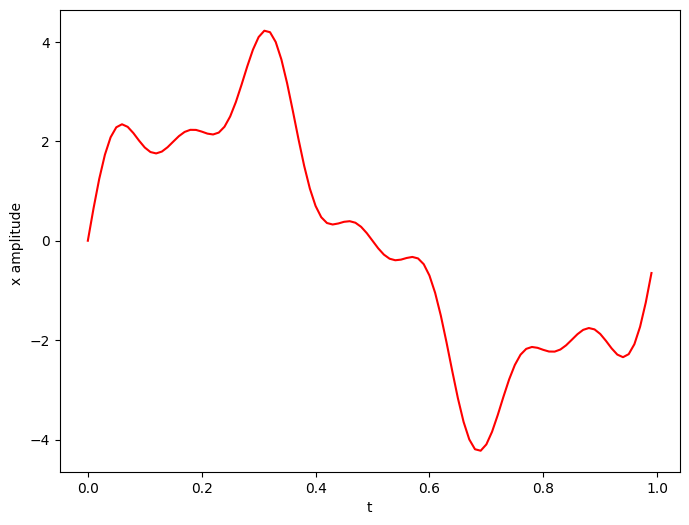

In [35]:
freq = 1.0
x = 3 * np.sin ( 2 * np.pi * freq * t )
freq = 4.0
x += np.sin ( 2 * np.pi * freq * t )
freq = 7.0 
x += 0.5* np.sin ( 2 * np.pi * freq * t )

plt.figure ( figsize = ( 8 , 6 ) )
plt.plot ( t , x , 'r' )
plt.xlabel ( 't' )
plt.ylabel ( 'x amplitude ' )

plt.show ()

Define dft ( x ) function which will calculate the DFT of the signal x ( t ) and takes in arguments:
x - input 1 dimensional real-valued signal.
N - number of elements

In [38]:
def dft ( x , N ) :
    x = np.array ( x )
    if x.size < N:
        x = np.pad ( x , ( 0 , N - x.size ) , 'constant' )
        print ( "Warning: x(t) padding because x.size < N" )
    elif x.size > N:
        x = x[:N]
    pprint.pprint ( f"{x=}" )

    # Initialize the array for DFT results
    X = np.zeros ( N , dtype = complex )
    pprint.pprint ( f"{X=}" )

    for m in range ( N ) :
        for n in range ( N ) :
            angle = -2j * np.pi * m * n / N
            X[m] += x[n] * np.exp ( angle )
    pprint.pprint ( f"{X=}" )
    
    return X

('x=array([0.        , 0.64995109, 1.24301   , 1.73098263, 2.08154121,\n'
 '       2.282616  , 2.34327722, 2.29102039, 2.1660258 , 2.01350931])')
('X=array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,\n'
 '       0.+0.j, 0.+0.j])')
('X=array([16.80193365+0.00000000e+00j, -3.89700186+2.36579173e+00j,\n'
 '       -1.53882206+1.26124834e+00j, -1.24242553+6.74029663e-01j,\n'
 '       -1.15560477+3.02422209e-01j, -1.13422519-1.12846928e-15j,\n'
 '       -1.15560477-3.02422209e-01j, -1.24242553-6.74029663e-01j,\n'
 '       -1.53882206-1.26124834e+00j, -3.89700186-2.36579173e+00j])')


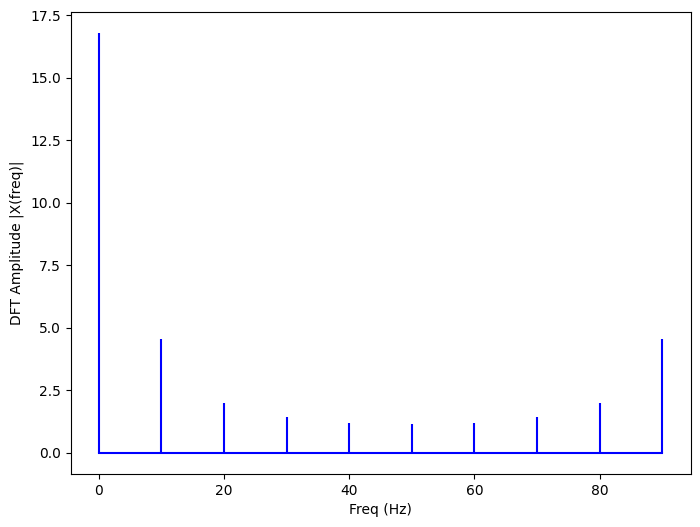

In [42]:
N = 10
X = dft ( x , N )

n = np.arange ( N )
T = N / samp_rate
freq = n / T 

plt.figure ( figsize = ( 8 , 6 ) )
plt.stem ( freq , abs ( X ) , 'b' , \
         markerfmt=" ", basefmt="-b")
plt.xlabel ( 'Freq (Hz)' )
plt.ylabel ( 'DFT Amplitude |X(freq)|' )
plt.show ()